In [2]:
import pandas as pd
import numpy as np
# Load Dataset
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Unnamed: 0,password,strength
0,0,kzde5577,1
1,1,kino3434,1
2,2,visi7k1yr,1
3,3,megzy123,1
4,4,lamborghin1,1


In [4]:
df = df[['password', 'strength']]
df.shape

(669425, 2)

In [5]:
df.describe()

,strength
count,669425.000000
mean,0.990217
std,0.507936
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [6]:
df.columns

Index(['password', 'strength'], dtype='object')

In [7]:
# Check For missing values
df.isnull().sum()

password    1
strength    0
dtype: int64

In [8]:
# Check Value Counts for Strength
df['strength'].value_counts()

1    496650
0     89662
2     83113
Name: strength, dtype: int64

Text(0, 0.5, 'Password Count')

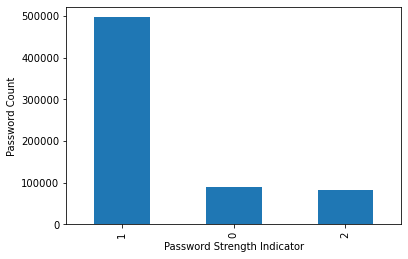

In [9]:
ax=df['strength'].value_counts().plot(kind='bar')
ax.set_xlabel("Password Strength Indicator")
ax.set_ylabel("Password Count")

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# For creating a pipeline
from sklearn.pipeline import Pipeline

# Classifier Model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# To save the trained model on local storage
import joblib


In [11]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,password,strength
0,0,kzde5577,1
1,1,kino3434,1
2,2,visi7k1yr,1
3,3,megzy123,1
4,4,lamborghin1,1


In [12]:
# Features which are passwords
features = data.values[:, 1].astype('str')

# Labels which are strength of password
labels = data.values[:, -1].astype('int')

In [13]:
# Sequentially apply a list of transforms and a final estimator
classifier_model = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char')),
                ('decisionTree',DecisionTreeClassifier()),
])

In [14]:
# Fit the Model
classifier_model.fit(features, labels)

# Training Accuracy
print('Training Accuracy: ',classifier_model.score(features, labels))

Training Accuracy:  0.9997236434253277


In [18]:
from sklearn.linear_model import LogisticRegression
classifier_model = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char')),
                ('logisticRegression',LogisticRegression(multi_class='multinomial', solver='sag')),
])

# Fit the Model
classifier_model.fit(features, labels)

# Training Accuracy
print('Training Accuracy: ',classifier_model.score(features, labels))

Training Accuracy:  0.8194540090376069
